<a href="https://colab.research.google.com/github/Uma11-dev/code-playground/blob/main/Intiution_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Choose a difficulty level:
1. Easy (1-10)
2. Medium (1-50)
3. Hard (1-100)
Enter your choice (1, 2, or 3): 1
How many rounds would you like to play?: 5

--- Round 1/5 ---
Tune into your inner knowing. Guess a number between 1 and 10.
What number does your intuition reveal? (1-10): 3
Yes! Your intuition aligns perfectly with the universal frequency!
Your current flow streak is: 1

--- Round 2/5 ---
Tune into your inner knowing. Guess a number between 1 and 10.
What number does your intuition reveal? (1-10): 5
Not quite this time. The subtle energies were pointing to 3. Your inner knowing is still calibrating.
Your current flow streak is: 0

--- Round 3/5 ---
Tune into your inner knowing. Guess a number between 1 and 10.
What number does your intuition reveal? (1-10): 6
Not quite this time. The subtle energies were pointing to 4. Your inner knowing is still calibrating.
Your current flow streak is: 0

--- Round 4/5 ---
Tune into your inner knowing. Guess a number between 1 and 10.
What 

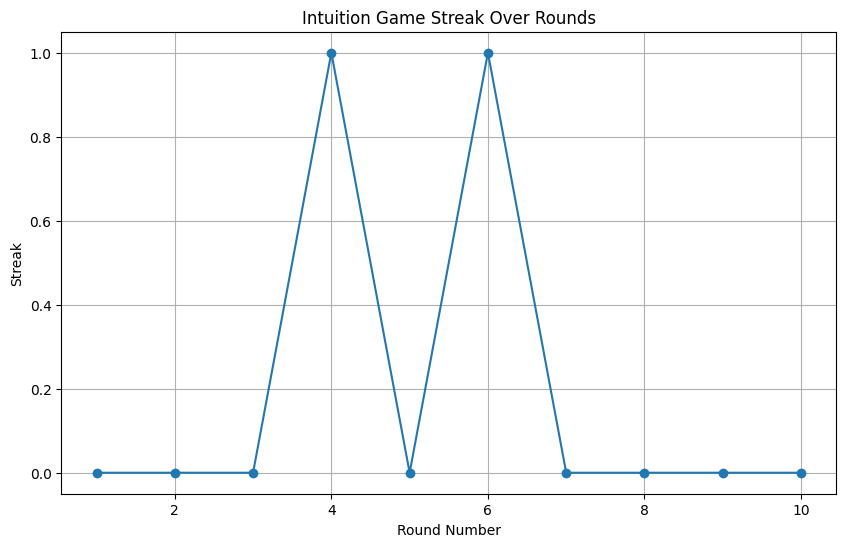

In [8]:
import random
import csv
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt



def intuition_game():
    correct_guesses = 0
    current_streak = 0
    log_file = "intuition_log.csv"

    # Prompt user for difficulty level
    while True:
        print("\nChoose a difficulty level:")
        print("1. Easy (1-10)")
        print("2. Medium (1-50)")
        print("3. Hard (1-100)")
        difficulty_choice = input("Enter your choice (1, 2, or 3): ")

        if difficulty_choice == '1':
            min_num = 1
            max_num = 10
            difficulty_level = "Easy (1-10)"
            break
        elif difficulty_choice == '2':
            min_num = 1
            max_num = 50
            difficulty_level = "Medium (1-50)"
            break
        elif difficulty_choice == '3':
            min_num = 1
            max_num = 100
            difficulty_level = "Hard (1-100)"
            break
        else:
            print("Invalid choice. Please enter 1, 2, or 3.")

    # Prompt user for the number of rounds and validate input
    while True:
        try:
            rounds_input_str = input("How many rounds would you like to play?: ")
            rounds = int(rounds_input_str)
            if rounds > 0:
                break
            else:
                print("Please enter a positive number of rounds.")
        except ValueError:
            print("Invalid input. Please enter an integer for the number of rounds.")


    # Check if file exists to decide if header is needed
    file_exists = os.path.isfile(log_file)

    # Open the CSV file for appending
    with open(log_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:
            writer.writerow(["datetime", "guess", "actual", "result", "streak", "min_num", "max_num"])

        # Loop over the number of rounds
        for i in range(rounds):
            print(f"\n--- Round {i+1}/{rounds} ---")
            print(f"Tune into your inner knowing. Guess a number between {min_num} and {max_num}.")

            # Program secretly chooses a number
            actual_number = random.randint(min_num, max_num)

            # Ask user for their guess (input) and Validate input
            while True:
                try:
                    user_input_str = input(f"What number does your intuition reveal? ({min_num}-{max_num}): ")
                    user_guess = int(user_input_str)

                    # Validate input is within the chosen range
                    if min_num <= user_guess <= max_num:
                        break
                    else:
                        print(f"That number is outside the current energetic range. Please enter a number between {min_num} and {max_num}.")
                except ValueError:
                    print("Listen closely... that wasn't a valid number. Please enter an integer.")

            # Compare guess with actual number
            if user_guess == actual_number:
                print("Yes! Your intuition aligns perfectly with the universal frequency!")
                correct_guesses += 1
                current_streak += 1
                result = "Your inner knowing is strong!"
            else:
                print(f"Not quite this time. The subtle energies were pointing to {actual_number}. Your inner knowing is still calibrating.")
                current_streak = 0
                result = "Take a moment to recalibrate"

            # Print the result for the round (including streak)
            print(f"Your current flow streak is: {current_streak}")

            # Log the details into the CSV
            timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            writer.writerow([timestamp, user_guess, actual_number, result, current_streak, min_num, max_num])

    # After loop ends, print session summary
    print("\n--- Session Summary ---")
    print(f"Difficulty Level: {difficulty_level}")
    print(f"Number Range: {min_num}-{max_num}")
    print(f"Total rounds: {rounds}")
    print(f"Correct alignments: {correct_guesses}")
    accuracy = (correct_guesses / rounds) * 100 if rounds > 0 else 0
    print(f"Alignment Accuracy: {accuracy:.2f}%")

    # --- Data Visualization (Moved inside the function) ---
    # Read the log data into a pandas DataFrame
    try:
        # Check if the log file exists and is not empty before trying to read it
        if os.path.exists(log_file) and os.stat(log_file).st_size > 0:
            df = pd.read_csv(log_file)

            # Ensure 'datetime' is in datetime format and create 'round' column
            df['datetime'] = pd.to_datetime(df['datetime'])
            # Filter for the current session's data if needed, but for simplicity, plotting all data for now
            # You might want to add a session ID to the log file for more precise plotting per session

            # Generate a 'round' number for plotting within this session's data
            # This assumes continuous rounds in the log or you might need a session identifier
            # For plotting all data logged so far:
            df['round'] = range(1, len(df) + 1)


            # Generate the streak plot
            plt.figure(figsize=(10, 6))
            plt.plot(df['round'], df['streak'], marker='o', linestyle='-')
            plt.xlabel('Round Number')
            plt.ylabel('Streak')
            plt.title('Intuition Game Streak Over Rounds')
            plt.grid(True)
            plt.show()
        else:
            print(f"\nLog file '{log_file}' not found or is empty. Cannot generate plot.")


    except FileNotFoundError:
        print(f"\nCould not find the log file '{log_file}' to generate plot.")
    except Exception as e:
        # Print the specific error message for better diagnosis
        print(f"\nAn error occurred while generating the plot: {e}")
        import traceback
        traceback.print_exc() # Also print the traceback for more details



intuition_game()